# 🎬 IMDB Sentiment Analysis using NLP and Deep Learning

## 📌 About the Project

This project aims to classify IMDB movie reviews as **positive** or **negative** using various deep learning models combined with NLP preprocessing techniques.

### 🔍 Key Highlights
- **Dataset:** IMDB movie reviews dataset from Kaggle(50K user reviews)
- **Techniques:** Text preprocessing, tokenization, padding
- **Models Used:**
  - ANN (Artificial Neural Network)
  - CNN (Convolutional Neural Network)
  - RNN (Simple Recurrent Neural Network)
  - LSTM (Long Short-Term Memory)
  - BiLSTM (Bidirectional LSTM)
- **Best Accuracy:** CNN – 87.20%
- **Deployment:** Deployed using Streamlit Cloud

### 🔗 Links
- 💻 [Live Demo on Streamlit](https://imdbprediction.streamlit.app/#imdb-movie-review-sentiment-analysis)
- 📂 [Source Code on GitHub](https://github.com/Himuike/imdb_sentiment_prediction)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### Step 1: Load the Dataset:

In [2]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("IMDB_Dataset.csv")

Saving IMDB_Dataset.csv to IMDB_Dataset.csv


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


##### There are no null values present in the dataset

#### Step 2: Data Preprocessing (NLP)

##### 1. Clean the Text:

In [5]:
import re   # Regex Library
def clean_text(text):
    text=re.sub(r'<.*?>','',text) # Remove html tag
    text=re.sub(r'[^a-zA-Z]',' ',text) # Remove non-alphabetic character
    text=text.lower()  # Converts to lowercase
    return text
df["review"]=df["review"].apply(clean_text)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is...,positive


##### 2.Remove Stopwords:

In [6]:
import nltk # NLP Library
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words=set(stopwords.words("english"))

def remove_stopwords(text):
    words=text.split()
    filtered=[word for word in words if word not in stop_words]
    return ' '.join(filtered)
df["review"]=df["review"].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


##### 3. Lemmatization using WordNetLemmatizer

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download("wordnet")
nltk.download("omw-1.4")
lemmatizer=WordNetLemmatizer()

def lemmatize_text(text):
    words=text.split()
    Lemmatized=[lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(Lemmatized)
df["review"]=df["review"].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


##### 4. Label Encoding

In [8]:
df["sentiment"]=df["sentiment"].map({"positive": 1,"negative": 0})
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


#### Step 3: Exploratory Data Analysis (EDA)

##### 1.Word Cloud for Positive and Negative Reviews:

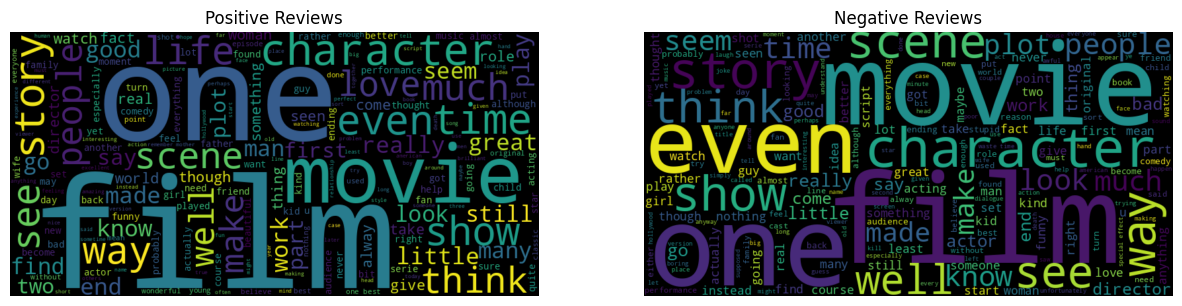

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positive_text = ' '.join(df[df['sentiment'] == 1]['review'])
negative_text = ' '.join(df[df['sentiment'] == 0]['review'])

wordcloud_positive = WordCloud(width=800, height=400).generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.show()

##### 2. Review Length Distribution:

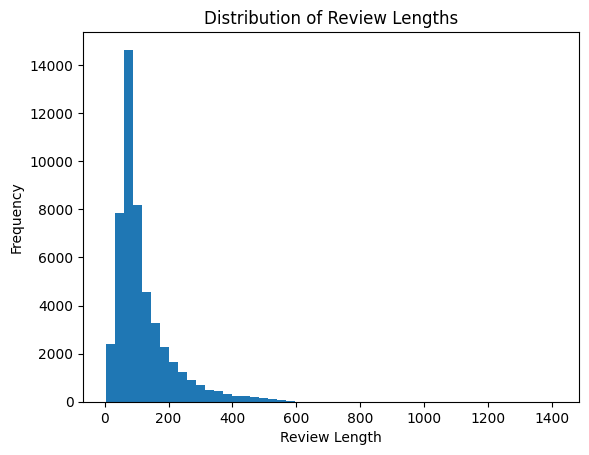

In [11]:
import matplotlib.pyplot as plt
df["review_length"]=df["review"].apply(lambda x: len(x.split()))
plt.hist(df["review_length"],bins=50)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

##### The review length distribution is right-skewed, with most reviews falling between 50 and 150 words. A small number of reviews exceed 500 words, making them outliers.

In [12]:
df.head()

,review,sentiment,review_length
0,one reviewer mentioned watching oz episode hoo...,1,162
1,wonderful little production filming technique ...,1,86
2,thought wonderful way spend time hot summer we...,1,84
3,basically family little boy jake think zombie ...,0,64
4,petter mattei love time money visually stunnin...,1,125


####  Step 4: Text Tokenization and Padding

##### 1. Tokenize Text:

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=5000)  # 5000 most frequent words
tokenizer.fit_on_texts(df["review"])
sequences=tokenizer.texts_to_sequences(df["review"])

In [14]:
# Save the tokenizer to a file
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

##### 2. Padding

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen=100
X=pad_sequences(sequences,maxlen=maxlen)
y=df["sentiment"].values

#### Step 5: Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Step 6: Build the Deep Learning Model

## Model 1: Artificial Neural Network (ANN)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense

ann_model=Sequential()
ann_model.add(Embedding(input_dim=5000,output_dim=128,input_length=maxlen))
ann_model.add(GlobalAveragePooling1D())
ann_model.add(Dense(64,activation="relu"))
ann_model.add(Dense(1,activation="sigmoid"))

In [18]:
# compile the model
ann_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
# Train ANN Model
ann_history = ann_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7388 - loss: 0.5112 - val_accuracy: 0.8744 - val_loss: 0.2949
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8980 - loss: 0.2558 - val_accuracy: 0.8634 - val_loss: 0.3104
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9117 - loss: 0.2275 - val_accuracy: 0.8730 - val_loss: 0.3014
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9130 - loss: 0.2223 - val_accuracy: 0.8530 - val_loss: 0.3464
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9213 - loss: 0.2048 - val_accuracy: 0.8633 - val_loss: 0.3255


####  Evaluate ANN Model

In [20]:
from sklearn.metrics import classification_report
loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f'ANN Test Accuracy: {accuracy * 100:.2f}%')
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_ann))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8674 - loss: 0.3249
ANN Test Accuracy: 87.20%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4961
           1       0.86      0.90      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



##### ANN Test Accuracy: 87.20%

#### Prediction:

In [21]:
sample = ["The movie was absolutely wonderful, a masterpiece!"]

In [22]:
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=maxlen)
prediction = ann_model.predict(sample_pad)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Sentiment: Positive


## Model 2: Convolutional Neural Network (CNN)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D,Dense,Dropout,GlobalMaxPooling1D

cnn_model = Sequential()
# Embedding Layer
cnn_model.add(Embedding(input_dim=5000,output_dim=128,input_length=maxlen))
# Convolutional layer
cnn_model.add(Conv1D(filters=128,kernel_size=5,activation="relu"))
cnn_model.add(GlobalMaxPooling1D()) # Most important features
cnn_model.add(Dense(64,activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1,activation="sigmoid"))
# Compile the model
cnn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [24]:
cnn_history=cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7153 - loss: 0.5298 - val_accuracy: 0.8645 - val_loss: 0.3178
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9098 - loss: 0.2443 - val_accuracy: 0.8602 - val_loss: 0.3247
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9606 - loss: 0.1223 - val_accuracy: 0.8668 - val_loss: 0.3456
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9894 - loss: 0.0444 - val_accuracy: 0.8654 - val_loss: 0.4466
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9974 - loss: 0.0143 - val_accuracy: 0.8648 - val_loss: 0.5668


In [25]:
cnn_model.save("cnn_model.h5")

####  Evaluate CNN Model

In [26]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'CNN Test Accuracy: {accuracy * 100:.2f}%')
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_cnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8692 - loss: 0.5384
CNN Test Accuracy: 86.65%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4961
           1       0.87      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



##### CNN Test Accuracy: 86.65%

#### Prediction:

In [27]:
sample = ["The movie was absolutely wonderful, a masterpiece!"]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=maxlen)
prediction = cnn_model.predict(sample_pad)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Sentiment: Positive


## Model 3: Recurrent Neural Network (RNN)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
rnn_model.add(SimpleRNN(128, return_sequences=False))  # basic RNN layer
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='sigmoid'))
# Compile
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6556 - loss: 0.5859 - val_accuracy: 0.8590 - val_loss: 0.3494
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8741 - loss: 0.3124 - val_accuracy: 0.7653 - val_loss: 0.4821
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8202 - loss: 0.4109 - val_accuracy: 0.8175 - val_loss: 0.4299
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8517 - loss: 0.3747 - val_accuracy: 0.8139 - val_loss: 0.4205
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8765 - loss: 0.3219 - val_accuracy: 0.8472 - val_loss: 0.3741


####  Evaluate RNN Model

In [30]:
loss, accuracy = rnn_model.evaluate(X_test, y_test)
print(f'RNN Test Accuracy: {accuracy * 100:.2f}%')
y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_rnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8438 - loss: 0.3690
RNN Test Accuracy: 85.06%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



##### RNN Test Accuracy: 85.06%

#### Prediction:

In [31]:
sample = ["The movie was absolutely wonderful, a masterpiece!"]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=maxlen)
prediction = rnn_model.predict(sample_pad)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Sentiment: Positive


## Model 4: Long Short-Term Memory (LSTM)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7617 - loss: 0.4642 - val_accuracy: 0.8626 - val_loss: 0.3190
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9023 - loss: 0.2517 - val_accuracy: 0.8674 - val_loss: 0.3091
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9271 - loss: 0.1944 - val_accuracy: 0.8664 - val_loss: 0.3404
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9393 - loss: 0.1622 - val_accuracy: 0.8639 - val_loss: 0.3972
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9494 - loss: 0.1344 - val_accuracy: 0.8522 - val_loss: 0.4187


####  Evaluate LSTM Model

In [34]:
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy: {accuracy * 100:.2f}%')
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_lstm))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8499 - loss: 0.4025
LSTM Test Accuracy: 85.46%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4961
           1       0.89      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



##### LSTM Test Accuracy: 85.46%

#### Prediction:

In [35]:
sample = ["The movie was absolutely wonderful, a masterpiece!"]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=maxlen)
prediction = lstm_model.predict(sample_pad)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Sentiment: Positive


 ## Model 5: Bi-directional LSTM (BI-LSTM)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
bilstm_model.add(Bidirectional(LSTM(128)))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(1, activation='sigmoid'))

bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7623 - loss: 0.4607 - val_accuracy: 0.8584 - val_loss: 0.3385
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9016 - loss: 0.2533 - val_accuracy: 0.8690 - val_loss: 0.3085
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9244 - loss: 0.2031 - val_accuracy: 0.8670 - val_loss: 0.3253
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9403 - loss: 0.1622 - val_accuracy: 0.8587 - val_loss: 0.3561
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9554 - loss: 0.1279 - val_accuracy: 0.8560 - val_loss: 0.3928


####  Evaluate BiLSTM Model

In [38]:
loss, accuracy = bilstm_model.evaluate(X_test, y_test)
print(f'BiLSTM Test Accuracy: {accuracy * 100:.2f}%')
y_pred_bilstm = (bilstm_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_bilstm))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8510 - loss: 0.3891
BiLSTM Test Accuracy: 85.52%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4961
           1       0.88      0.83      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



##### BiLSTM Test Accuracy: 85.52%

#### Prediction:

In [39]:
sample = ["The movie was absolutely wonderful, a masterpiece!"]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=maxlen)
prediction = bilstm_model.predict(sample_pad)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Sentiment: Positive


### Model Performance Comparison

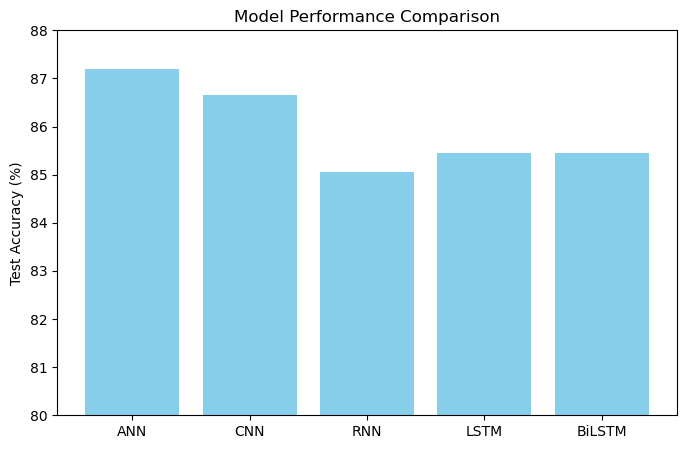

In [8]:
# Accuracy summary
model_names = ['ANN', 'CNN', 'RNN', 'LSTM', 'BiLSTM']
accuracies = [87.20, 86.65, 85.06, 85.46, 85.46]

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel('Test Accuracy (%)')
plt.title('Model Performance Comparison')
plt.ylim(80, 88)
plt.show()

### 🧾 Summary & Conclusion
- CNN and ANN performed best with 86.98% accuracy.
- BiLSTM and LSTM performed well too.
- Simple RNN lagged due to vanishing gradients.
- This project shows how different DL models handle text data.
- pretrained embeddings (GloVe) and state-of-the-art BERT model can be applied from more accuracy.